In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def generateLinearTrajectory(t, x0 = 100, vy = 100, y=0, h = 20, sigma2 = 0):
    return np.sqrt(x0**2+((vy*t)+y)**2+h**2) + sigma2*np.random.randn(len(t))

class channel:
    def __init__(self, recordedTrajectory, t, x=0, y=0, z=0):
        # position
        self.x = x
        self.y = y
        self.z = z
        self.t = t
        self.recordedTrajectory = recordedTrajectory

In [87]:
class RangeModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.x = torch.nn.Parameter(torch.ones(200)*100)
        self.y = torch.nn.Parameter(torch.ones(200)*100)
        self.z = torch.nn.Parameter(torch.ones(200)*100)
        self.double()

    def forward(self, channel):
        return torch.sqrt((self.x + channel.x)**2 + (self.y + channel.y)**2 + (self.z + channel.z)**2) # + torch.sqrt(self.x**2 + self.y**2 + self.z**2)

    def fit(self, channels, lr = 1e-3, steps = 1000):
        criterion = torch.nn.MSELoss(reduction='sum')
        optimizer = torch.optim.SGD(self.parameters(), lr=lr)

        history = []

        for _ in range(steps):
            for channel in channels:
                y_pred = self(channel)
                loss = criterion(y_pred, torch.tensor(channel.recordedTrajectory))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                history.append(loss.detach().numpy())
        return history

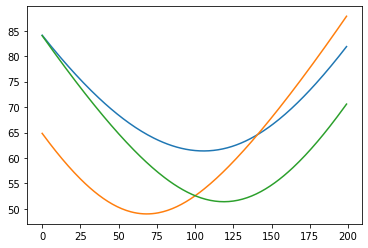

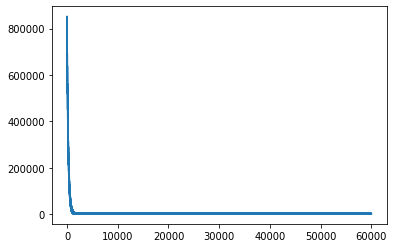

In [97]:
t = np.arange(-1,1,1e-2)
sigma = 0


x0 = 100
vy = 100
y = 0
h = 0

# channel position
x = 0
y = 0
z = 0
ch1 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 10
z = 0
ch2 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 0
z = 10
ch3 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

model = RangeModel()
history = model.fit([ch1, ch2, ch3], lr=1e-3, steps=20000)

plt.plot(model.x.detach().numpy())
plt.plot(model.y.detach().numpy())
plt.plot(model.z.detach().numpy())
plt.show()

plt.plot(history)
plt.show()

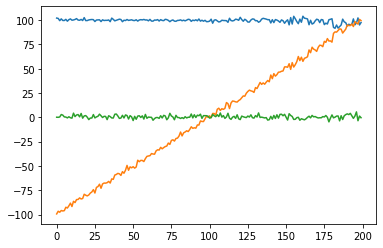

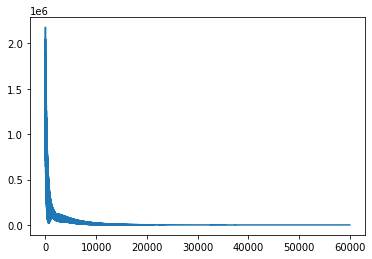

In [94]:
t = np.arange(-1,1,1e-2)
sigma = 1


x0 = 100
vy = 100
y = 0
h = 0

# channel position
x = 0
y = 0
z = 0
ch1 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 100
z = 0
ch2 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 0
z = 100
ch3 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

model = RangeModel()
history = model.fit([ch1, ch2, ch3], lr=1e-3, steps=20000)

plt.plot(model.x.detach().numpy())
plt.plot(model.y.detach().numpy())
plt.plot(model.z.detach().numpy())
plt.show()

plt.plot(history)
plt.show()

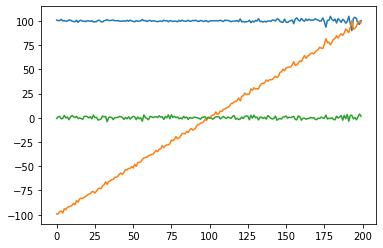

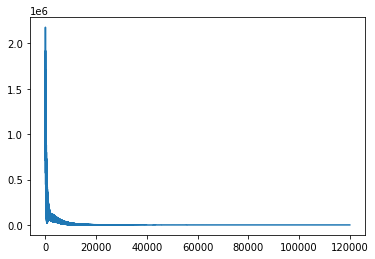

In [95]:
t = np.arange(-1,1,1e-2)
sigma = 1


x0 = 100
vy = 100
y = 0
h = 0

# channel position
x = 0
y = 0
z = 0
ch1 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 100
z = 0
ch2 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 0
z = 100
ch3 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 0
z = 0
ch4 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 100
z = 0
ch5 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

# channel position
x = 0
y = 0
z = 100
ch6 = channel(generateLinearTrajectory(t, x0+x, vy, y, h+z, sigma2=sigma), t, x, y, z)

model = RangeModel()
history = model.fit([ch1, ch2, ch3, ch4, ch5, ch6], lr=1e-3, steps=20000)

plt.plot(model.x.detach().numpy())
plt.plot(model.y.detach().numpy())
plt.plot(model.z.detach().numpy())
plt.show()

plt.plot(history)
plt.show()